In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [142]:
df =sns.load_dataset("tips")

In [143]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [145]:
X = df[['tip', 'sex', 'smoker', 'day', 'size']]
y = df['time']

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [147]:
X_train.head()


,tip,sex,smoker,day,size
115,3.50,Female,No,Sun,2
181,5.65,Male,Yes,Sun,2
225,2.50,Female,Yes,Fri,2
68,2.01,Male,No,Sat,2
104,4.08,Female,No,Sat,2


In [148]:
X_test

,tip,sex,smoker,day,size
24,3.18,Male,No,Sat,2
6,2.00,Male,No,Sun,2
153,2.00,Male,No,Sun,4
211,5.16,Male,Yes,Sat,4
198,2.00,Female,Yes,Thur,2
...,...,...,...,...,...
172,5.15,Male,Yes,Sun,2
242,1.75,Male,No,Sat,2
152,2.74,Male,No,Sun,3
231,3.00,Male,Yes,Sat,3


In [149]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()


In [150]:
X_train['sex'] = le1.fit_transform(X_train['sex'])
X_train['smoker'] = le2.fit_transform(X_train['smoker'])
y_train = le3.fit_transform(y_train)


In [151]:
y_test = le3.transform(y_test)

In [152]:
X_test.head()

,tip,sex,smoker,day,size
24,3.18,Male,No,Sat,2
6,2.00,Male,No,Sun,2
153,2.00,Male,No,Sun,4
211,5.16,Male,Yes,Sat,4
198,2.00,Female,Yes,Thur,2


In [153]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [154]:
X_test['sex'] = le1.transform(X_test['sex'])
X_test['smoker'] = le2.transform(X_test['smoker'])


In [155]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['day'])
    ],
    remainder='passthrough'
)
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [156]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [158]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

Accuracy: 0.9508196721311475
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.85      1.00      0.92        17

    accuracy                           0.95        61
   macro avg       0.93      0.97      0.94        61
weighted avg       0.96      0.95      0.95        61



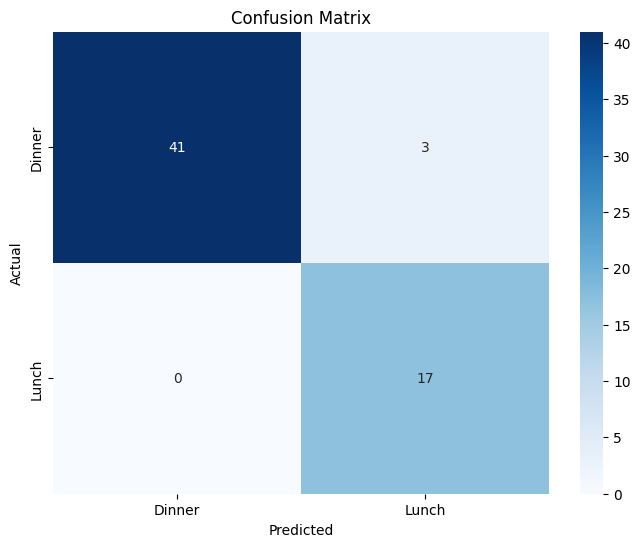

In [157]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le3.classes_, yticklabels=le3.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()